## Worked Convolution Example

You are modeling a simplified muscle twitch response using an LTI system.

The **impulse response** is given by:

$$
h(t) = 
\begin{cases}
1 - t, & 0 \le t < 1 \\
0, & \text{otherwise}
\end{cases}
\quad \text{(a decreasing ramp)}
$$

The **input signal** (stimulus) is:

$$
x(t) = 
\begin{cases}
t, & 0 \le t < 1 \\
0, & \text{otherwise}
\end{cases}
\quad \text{(an increasing ramp)}
$$

---

### A) $x(t)$, $h(t)$, and $y(t) = x(t) * h(t)$

- $x(t)$: A ramp increasing from 0 to 1 between $t = 0$ and $t = 1$
- $h(t)$: A ramp decreasing from 1 to 0 between $t = 0$ and $t = 1$
- $y(t)$: Result of convolving a rising ramp with a falling ramp — produces a **parabolic bump** over $0 \le t < 2$

---

### B) [20 pts] Use convolution to derive $y(t)$

Use the convolution integral:

$$
y(t) = \int_{-\infty}^{\infty} x(\tau) h(t - \tau) d\tau
$$

Since both functions are nonzero only in \([0, 1]\), the convolution is nonzero for:

$$
0 \le t < 2
$$

---

### 🟩 Region I: $0 \le t < 1$

$$
x(\tau) = \tau, \quad h(t - \tau) = 1 - (t - \tau) = \tau - t + 1
$$

$$
y(t) = \int_0^t \tau(\tau - t + 1) d\tau = \int_0^t (\tau^2 - \tau(t - 1)) d\tau
$$

Break into parts:

$$
\int_0^t \tau^2 d\tau = \frac{t^3}{3}, \quad \int_0^t \tau d\tau = \frac{t^2}{2}
$$

$$
y(t) = \frac{t^3}{3} - (t - 1)\frac{t^2}{2} = \frac{t^3}{3} - \frac{(t - 1)t^2}{2}
$$

---

### 🟨 Region II: $1 \le t < 2$

$$
x(\tau) = \tau, \quad h(t - \tau) = \tau - t + 1
$$

Limits of overlap: $\tau \in [t - 1, 1]$

$$
y(t) = \int_{t-1}^{1} \tau(\tau - t + 1) d\tau = \int_{t-1}^{1} (\tau^2 - \tau(t - 1)) d\tau
$$

Use definite integrals:

$$
\int_a^b \tau^2 d\tau = \frac{b^3 - a^3}{3}, \quad \int_a^b \tau d\tau = \frac{b^2 - a^2}{2}
$$

Where $a = t-1, \, b = 1$:

$$
y(t) = \left[ \frac{1 - (t - 1)^3}{3} \right] - (t - 1)\left[ \frac{1 - (t - 1)^2}{2} \right]
$$

---

### ✅ Final Answer:

$$
y(t) =
\begin{cases}
\frac{t^3}{3} - \frac{(t - 1)t^2}{2}, & 0 \le t < 1 \\
\frac{1 - (t - 1)^3}{3} - \frac{(t - 1)(1 - (t - 1)^2)}{2}, & 1 \le t < 2 \\
0, & \text{otherwise}
\end{cases}
$$

---

### Optional: Sketch Guidance for Region Shading

- **Region I:** $0 \le t < 1$  
  Shade from $\tau = 0$ to $\tau = t$. $h(t - \tau)$ is increasing.

- **Region II:** $1 \le t < 2$  
  Shade from $\tau = t - 1$ to $\tau = 1$. $h(t - \tau)$ is decreasing.


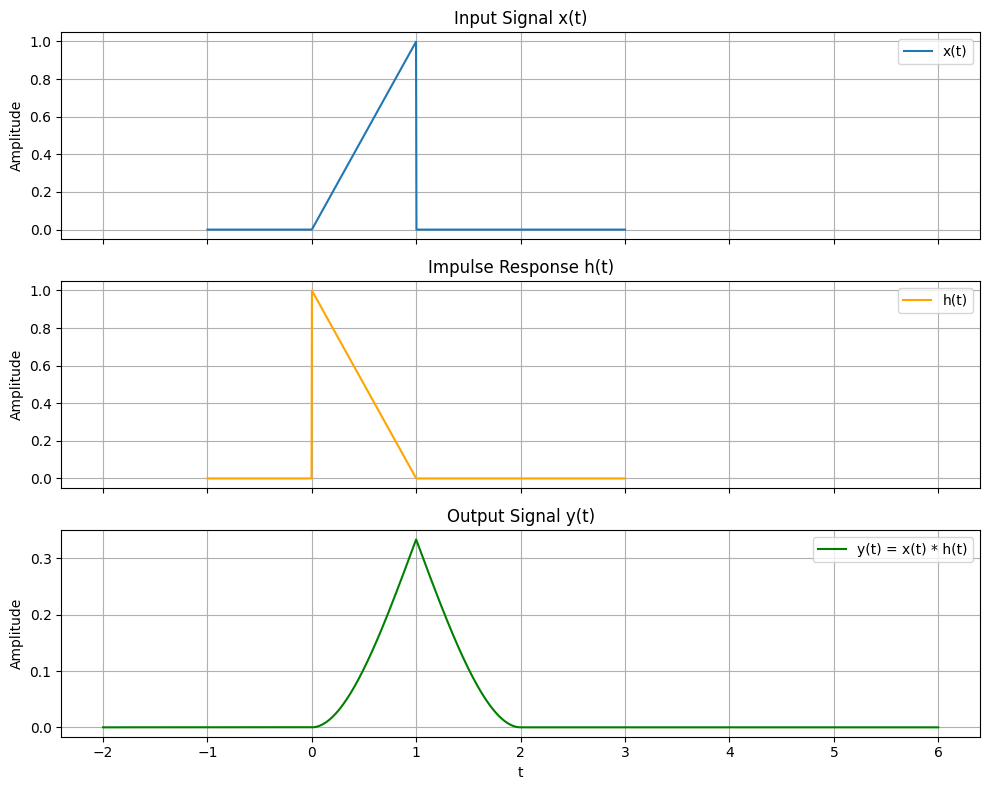

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# Define time range
t = np.linspace(-1, 3, 1000)
dt = t[1] - t[0]

# Define x(t) = t for 0 <= t < 1, 0 otherwise
x = np.where((t >= 0) & (t < 1), t, 0)

# Define h(t) = 1 - t for 0 <= t < 1, 0 otherwise
h = np.where((t >= 0) & (t < 1), 1 - t, 0)

# Compute convolution using numerical integration
y = convolve(x, h, mode='full') * dt

# Create time axis for convolution result
t_y = np.linspace(2 * t[0], 2 * t[-1], len(y))

# Plot
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

axs[0].plot(t, x, label='x(t)')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Input Signal x(t)')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(t, h, label='h(t)', color='orange')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Impulse Response h(t)')
axs[1].grid(True)
axs[1].legend()

axs[2].plot(t_y, y, label='y(t) = x(t) * h(t)', color='green')
axs[2].set_xlabel('t')
axs[2].set_ylabel('Amplitude')
axs[2].set_title('Output Signal y(t)')
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()


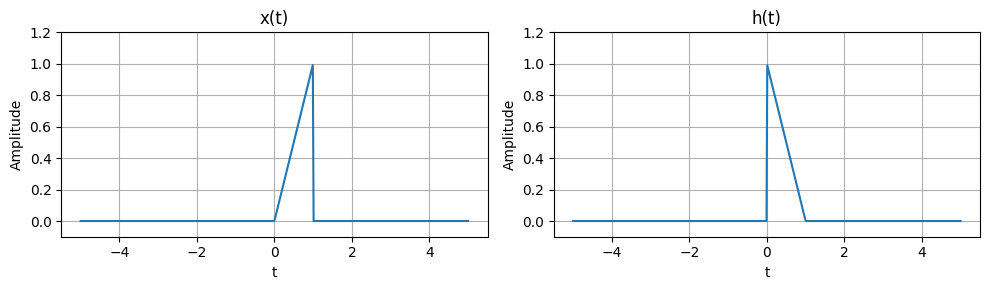

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
%matplotlib inline
# t = np.linspace(-1, 3, 1000)
# dt = t[1] - t[0]

# # Define x(t) = t for 0 <= t < 1, 0 otherwise
# x = np.where((t >= 0) & (t < 1), t, 0)

# # Define h(t) = 1 - t for 0 <= t < 1, 0 otherwise
# h = np.where((t >= 0) & (t < 1), 1 - t, 0)

def x(t):
  return  np.where((t >= 0) & (t < 1), t, 0)

def h(t):

  return np.where((t >= 0) & (t < 1), 1 - t, 0)

# Define a common time axis for plotting later
tau_min = -5
tau_max = 5
tau_steps = 500
tau = np.linspace(tau_min, tau_max, tau_steps)

# Plot the original functions to see what they look like
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(tau, x(tau))
plt.title('x(t)')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.grid(True)
plt.ylim(-0.1, 1.2)

plt.subplot(1, 2, 2)
plt.plot(tau, h(tau))
plt.title('h(t)')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.grid(True)
plt.ylim(-0.1, 1.2)

plt.tight_layout()
plt.show()

In [ ]:
def plot_overlap(t_shift=0.0):
    """
    Plots x(tau), h(t_shift - tau), and their product for a given shift t_shift.
    """
    # Calculate the functions for the current shift
    x_tau = x(tau)
    h_flipped_shifted = h(t_shift - tau)
    product = x_tau * h_flipped_shifted

    # Create the plot
    plt.figure(figsize=(10, 5))
    plt.plot(tau, x_tau, label='x(τ)')
    plt.plot(tau, h_flipped_shifted, label=f'h({t_shift:.1f} - τ)')
    # plt.fill_between(tau, product, alpha=0.3, label='Overlap Product: x(τ)h(t-τ)', color='orange')

    # Add plot details
    plt.title(f'Overlap of x(τ) and h(t - τ) for t = {t_shift:.1f}')
    plt.xlabel('τ')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.ylim(-0.1, 1.5) # Adjust ylim to make space for legend
    plt.xlim(tau_min, tau_max)
    plt.show()
interact(plot_overlap, t_shift=FloatSlider(min=-3.0, max=4.0, step=0.1, value=0.0, description='Shift (t):'))

interactive(children=(FloatSlider(value=0.0, description='Shift (t):', max=4.0, min=-3.0), Output()), _dom_cla…